 Ecuaciones de Wiener-Hopf

 *R_uu * b = r_ud*

*b = inv(R_uu) * r_ud*


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.io as sio
import scipy.linalg as salg

In [3]:
# SINTETIZO UN RITMO DE EEG Y LO METO COMO SEÑAL A IDENTIFICAR
# Se puede generar mediante un sistema un par de polos y ceros conjugados
# La frecuencia de los polos y ceros 

In [4]:
# Synthesized EEG

# Poles and zeros

def EEG_synthesized(fc, fs, N):
  r1 = 0.65
  r2 = 0.99
  tita = 2*np.pi*fc/fs
  b = [1, -2*r1*np.cos(tita), r1**2]
  a = [1, -2*r2*np.cos(tita), r2**2]

  X = np.random.randn(N)
  EEG = sg.lfilter(b, a, X)

  return EEG,X
 

## Sintetizo EEG

(0.0, 128.0)

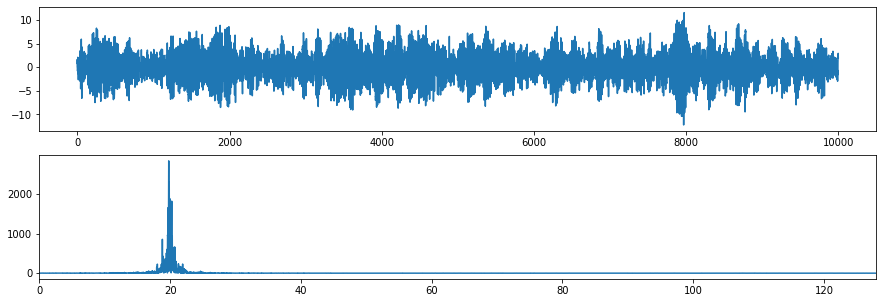

In [5]:
fs = 256
fc = 20   # Concentrated energy in fc
N = 10000
# EEG rithm synthesized with fc
EEG, X = EEG_synthesized(fc, fs, N)
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(EEG)
# Obtengo el periodograma
S_EEG = np.abs(np.fft.fft(EEG))**2 / N
f = np.linspace(0,fs,N)
plt.subplot(212)
plt.plot(f,S_EEG)
plt.xlim([0, fs/2])


## Obtengo el filtro de Wiener-Hopf que resulta equivalente al sistema ARMA de arriba

In [6]:
N = 1000
fs = 256
fc = 20
L = 30

# Sintetizo el ritmo de EEG con frecuencia central fc
EEG, X = EEG_synthesized(fc, fs, N)

(30, 30) (1999,) (30,)
(1.961868598330061+0j)
coefs:  (30,)


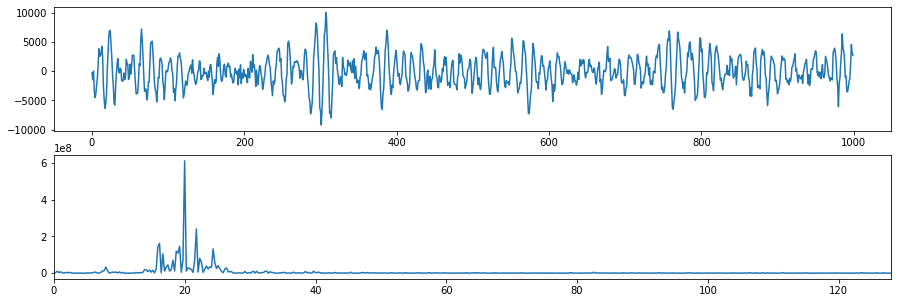

In [7]:
# WeinerHopf
rdu_0_idx = (2*X.shape[0]-1)//2
# Armo señal de correlacion cruzada entre d[n] (EEG) y u[n] (X)
r_du = (np.correlate(EEG, X, 'full'))[rdu_0_idx:rdu_0_idx+L]
# print('maximo rud: ', np.where(np.max(r_ud))[0])

r_uu = (np.correlate(X, X, 'full'))/N
r_uu_idx = np.argmax(r_uu)
R_uu = salg.toeplitz(r_uu[r_uu_idx:r_uu_idx+L])
print(R_uu.shape, r_uu.shape, r_du.shape)
# print(R_uu)

# chequeo condicionamiento de R_uu
Ruu_avals = salg.eigvals(R_uu)
# print(Ruu_avals)
Rx_cond = np.amax(Ruu_avals)/np.amin(Ruu_avals)
if Rx_cond > 1000:
  raise Exception("Matriz Rx MAL CONDICIONADA")
print(Rx_cond)

b_L = salg.inv(R_uu) @ r_du

print('coefs: ' , b_L.shape)

eeg_hat = sg.lfilter(b_L, 1, X)

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(eeg_hat)
# Obtengo el periodograma
S_eeg_hat = np.abs(np.fft.fft(eeg_hat))**2 / N
f = np.linspace(0,fs,N)
plt.subplot(212)
plt.plot(f,S_eeg_hat)
plt.xlim([0, fs/2]);

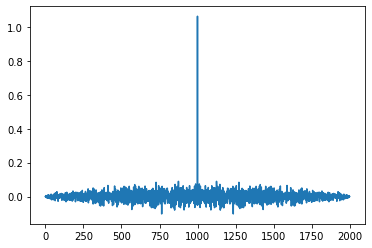

In [8]:
plt.plot(r_uu)

# Filtros Óptimos adaptativos

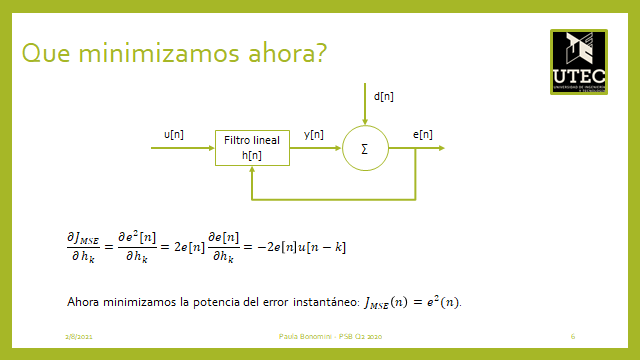

# Filtros óptimos adaptativos. Configuración ANC.

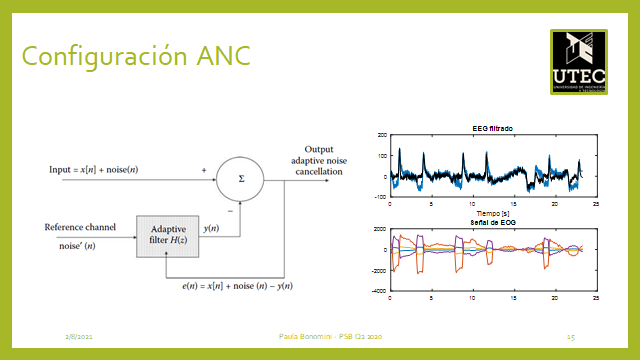

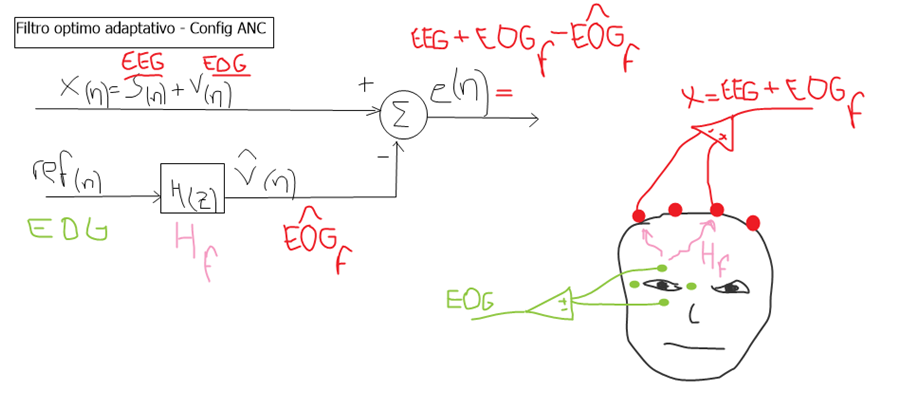

# Ejercicio 1: 
Filtrado del ECG fetal que interfiere en el ECG materno.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


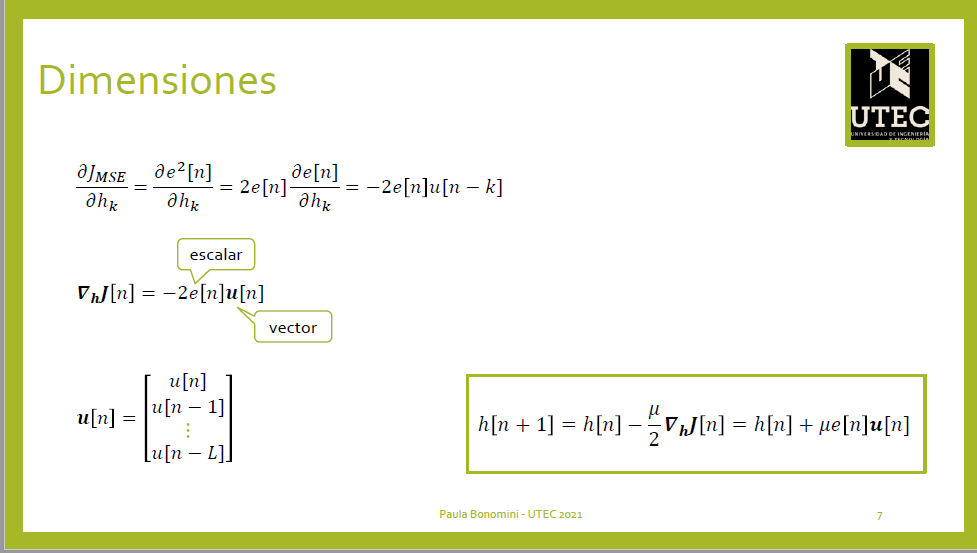

(130.0, 132.0)

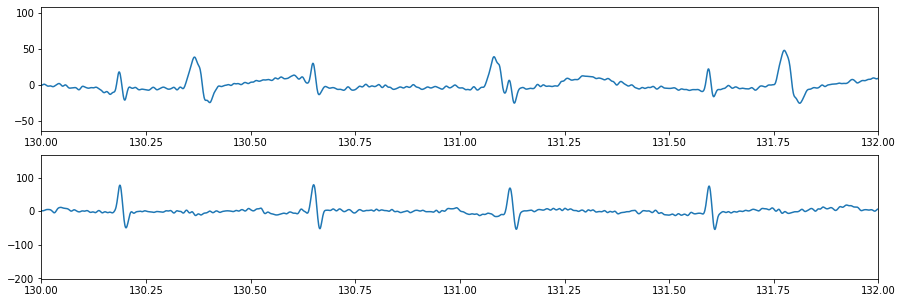

In [10]:
import scipy.io
mat = scipy.io.loadmat('/content/drive/My Drive/SIM2022Q2/señales/Fetal.mat')
u = mat['feto'][0]  #ruido
ECG = mat['materno'][0]
fs = mat['fs'][0][0]
t = np.linspace(0,len(ECG)/fs,len(ECG))

plt.figure(figsize=(15,5))
ax1 = plt.subplot(211)

ax1.plot(t,ECG)
plt.xlim((130,132))

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(t,u)
plt.xlim((130,132))


In [31]:
# # Inicializo los pesos h[n]
# N = u.size
# h = np.zeros(L+1,N)
# conv_hu = (np.convolve(h, u, 'full'))/N
# mu = 1/(L*r_uu[0])
# error = np.zeros(L)
# # Armo señal de correlacion cruzada entre h[n] y u[n](ECG fetal)
# for n in range(L,N-1):
#   conv_hu = (np.convolve(h, np.flip(u[n-L:n]), 'same'))
#   error = EEG[n-L]-conv_hu
#   h[n-L+1] = h[n-L] - mu*error[n-L]*u[n-L]